<a href="https://colab.research.google.com/github/MohamedElashri/Revisiting-Supernova-Project-data/blob/master/Supernovae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First part

In [15]:
# Importing packages 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm


In [16]:
# call and read data in the table
# Data from SCP:
# http://supernova.lbl.gov/Union/
# http://arxiv.org/abs/1105.3470
# wget http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt
data = np.genfromtxt('Data/SCPUnion2.1_mu_vs_z.txt')
# define redshifts (zs), magnitudes (mm) and magnitude estimated errors (dm)
zs = data.T[1]
mm = data.T[2]
dm = data.T[3]
dlabel = 'Data'


 mm is the "distance modulus" 
 
 We compute the distance in parsecs (pc)


In [17]:
# Define essential constants in the analysis

dpc = 10.**(mm/5.+1.)
# and in megaparsecs (Mpc)
dMpc = dpc / 10.**6
# and the error on that distance:
dMe = 10.**((mm+dm)/5.+1.-6.) - dMpc

# We us the Hubble relation :  d = c*z/H0 , with H0 in km/s/Mpc
c = 3.e5   # speed of light in km/s
# For more accurate modeling for Hubble relation, the Hubble relation is d = c*z*sqrt(z)/H0
# let's estimate H0 from the data; but only for small zs in linear region 
# we get the best value compared with the accepted value now
indx = np.where(zs < 0.05)
H0 = (c/dMpc[indx]*zs[indx]).mean()
#H0 = (c/dMpc[indx]*zs[indx]*np.sqrt(1+zs[indx])).mean()
# make a string to print on the plot:
sH0 = 'H0 = '+str(round(H0))+' km/s/Mpc'
print ('hubble estimation is',sH0)



hubble estimation is H0 = 68 km/s/Mpc


In [18]:
# define our models distance relations


# we will draw curves to "predict" where the data points should lie.
# first, make a vector of redshifts with the numpy "arange" function.
dz = 0.001
zz = np.arange(dz,2.0,dz)
# the simplest (linear in z) Hubble relation curve:
ds1 = c/H0*zz
# a bit more accurate (and very similar to FRW with OmM = 0.43)
ds2 = c/H0*zz*np.sqrt(1.+zz)
# The general Hubble relation, Standard cosmological model, CDMLambda
OmM = 0.3  # fraction of matter, both ordinary matter (7%) and dark matter (23%)
OmL = 1. - OmM   # fraction of dark energy. They sum to 1 in our flat universe.
# This is the Friedmann-Robertson-Walker (FRW) integral for a flat universe:
ds3 = c/H0*np.cumsum(1./np.sqrt(OmM*(1+zz)**3+OmL))*dz*(1.+zz)
# in terms of magnitudes rather than distance:
m1 = (np.log10(ds1)+5.)*5. 
m2 = (np.log10(ds2)+5.)*5. 
m3 = (np.log10(ds3)+5.)*5. 


chisq2, chisq3 =  0.9805546495975834 0.9620136723761287


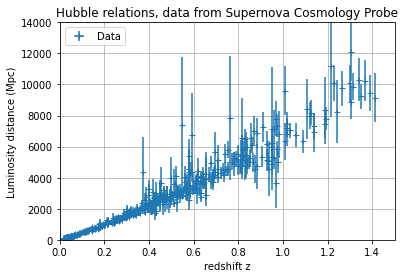

In [19]:
# compute the match between the data and the predictions,
#  using the chisq-per-degree-of-freedom:
# get the predictions at the same redshifts as the data, by interpolating:
dp2 = np.interp(zs,zz,ds2)
dp3 = np.interp(zs,zz,ds3)
# compute the chisq per degree of freedom:
chisq2 = np.sum( ((dMpc-dp2)/dMe)**2 ) / dMpc.size
chisq3 = np.sum( ((dMpc-dp3)/dMe)**2 ) / dMpc.size
print ('chisq2, chisq3 = ',chisq2,chisq3)

##############
# draw a linear-linear plot with all the data and the three Hubble relation curves:
plt.figure()
plt.errorbar(zs,dMpc,xerr=dz,yerr=dMe,fmt='+',label=dlabel)
#plt.plot(zz,ds1,'m',label="d = c/H0*z, linear")
#plt.plot(zz,ds2,'g',label="d = c/H0*z*sqrt(1+z),non-linear")
#plt.plot(zz,ds3,'pink',label="d = c/H0*FRW(z), FRW Model")
plt.xlim([0,1.5])
plt.ylim([0,14000])
plt.xlabel('redshift z')
plt.ylabel('Luminosity distance (Mpc)')
#plt.text(0.1,9000,sH0,fontsize = 12)
plt.grid(b=True,which='both')
plt.legend(loc='upper left')
plt.title('Hubble relations, data from Supernova Cosmology Probe')
plt.show()


 zoom in on the lower left corner to see that all three curves.  agree with the data. The linear Hubble relation works fine for z < 0.1.


In [20]:
# plot in terms of magnitudes (log scale) rather than distance:
plt.figure()
plt.errorbar(zs,mm,xerr=dz,yerr=dm,fmt='+',label=dlabel)
plt.plot(zz,m1,'m',label="d = c/H0*z, linear")
plt.plot(zz,m2,'g',label="d = c/H0*z*sqrt(1+z),non-linear")
plt.plot(zz,m3,'pink',label="d = c/H0*FRW(z), FRW Model")
plt.xlim([0.,1.5])
plt.ylim([32,46])
plt.xlabel('redshift z')
plt.ylabel('Luminosity magnitude')
plt.text(0.1,9000,sH0,fontsize = 12)
plt.grid(b=True,which='both')
plt.legend(loc='lower right')
plt.title('Hubble relations, data from Supernova Cosmology Probe')
plt.show()


ValueError: ignored

<Figure size 432x288 with 1 Axes>

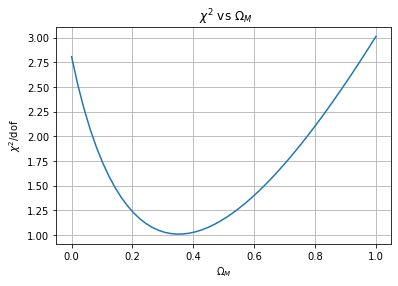

In [21]:
# here we crudely estimate the best-fit value of OmM,
# assuming OmL = 1-OmM, and OmK = 0 (flat universe).
OmMs = np.linspace(0.,1.,50)
ch = np.zeros(OmMs.size)
for I in np.arange(OmMs.size):
    OmM = OmMs[I]
    OmL = 1.-OmM
    ds = c/H0*np.cumsum(1./np.sqrt(OmM*(1+zz)**3+OmL))*dz*(1.+zz)
    ms = (np.log10(ds)+5.)*5.
    mp = np.interp(zs,zz,ms)
    ch[I] = np.sum( ((mm-mp)/dm)**2 ) / mm.size

plt.figure()
plt.plot(OmMs,ch)
# we can use LaTeX to get greek letters:
plt.xlabel(r'$\Omega_M$')
plt.ylabel(r'$\chi^2$/dof')
plt.title(' $\chi^2$ vs $\Omega_M$')
plt.grid()
plt.show()


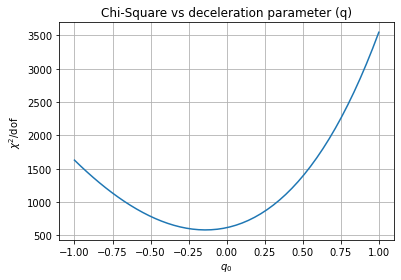

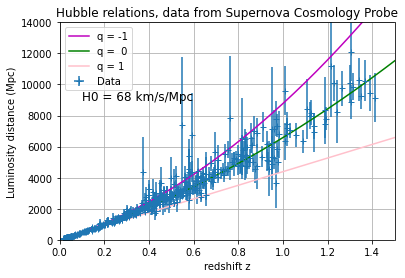

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [22]:
# Now in terms of a deceleration parameter q0 (flat universe).
# q0 = +1 for a constant linear Hubble Law.
# q0 = 1/2 for a matter universe. q0 < 0 means acceleration.
qs = np.linspace(-1.,1.,50)
ch = np.zeros(qs.size)
for I in np.arange(qs.size):
    q = qs[I]
    #ds = c/H0*(zz+(1-q)/2.*zz**2)
    ds = c/H0*(zs+(1-q)/2.*zs**2)
    ms = (np.log10(ds)+5.)*5.
    #mp = np.interp(zs,zz,ms)
    ch[I] = np.sum( ((mm-ms)/dm)**2 )

plt.figure()
plt.plot(qs,ch)
plt.xlabel(r'$q_0$')
plt.ylabel(r'$\chi^2$/dof')
plt.title('Chi-Square vs deceleration parameter (q)')
plt.grid()
plt.show()

# three extreme models
q1 = -1.
ds1 = c/H0*(zz+(1-q1)/2.*zz**2)
m1 = (np.log10(ds1)+5.)*5.
q2 =  0.
ds2 = c/H0*(zz+(1-q2)/2.*zz**2)
m2 = (np.log10(ds2)+5.)*5.
q3 =  1.
ds3 = c/H0*(zz+(1-q3)/2.*zz**2)
m3 = (np.log10(ds3)+5.)*5.

# plot d-v-z
plt.figure()
plt.errorbar(zs,dMpc,xerr=dz,yerr=dMe,fmt='+',label=dlabel)
plt.plot(zz,ds1,'m',label="q = -1")
plt.plot(zz,ds2,'g',label="q =  0")
plt.plot(zz,ds3,'pink',label="q = 1")
plt.xlim([0,1.5])
plt.ylim([0,14000])
plt.xlabel('redshift z')
plt.ylabel('Luminosity distance (Mpc)')
plt.text(0.1,9000,sH0,fontsize = 12)
plt.grid(b=True,which='both')
plt.legend(loc='upper left')
plt.title('Hubble relations, data from Supernova Cosmology Probe')
plt.show()

# plot m-v-z
plt.figure()
plt.errorbar(zs,mm,xerr=dz,yerr=dm,fmt='+',label=dlabel)
plt.plot(zz,m1,'m',label="q = -1")
plt.plot(zz,m2,'g',label="q = 0")
plt.plot(zz,m3,'pink',label="q = +1")
plt.xlim([0.,1.5])
plt.ylim([32,46])
plt.xlabel('redshift z')
plt.ylabel('Luminosity magnitude')
plt.text(0.1,9000,sH0,fontsize = 12)
plt.grid(b=True,which='both')
plt.legend(loc='lower right')
plt.title('Hubble relations, data from Supernova Cosmology Probe')
plt.show()


In [23]:
# now via linear regression:
A = np.mat([[np.sum(zs**2/dMe**2),np.sum(zs**3/dMe**2)], \
            [np.sum(zs**3/dMe**2),np.sum(zs**4/dMe**2)]])
B = np.array([np.sum(zs*dMpc/dMe**2),np.sum(zs**2*dMpc/dMe**2)])
R = np.linalg.solve(A,B)
# disentangle the physical parameters
H0f = c/R[0]
qf = 1.-2.*R[1]/R[0]
# and the errors (correlated)
eH0f = H0f*np.sqrt(A.I[0,0])/R[0]
# get the error on q!
print ('R, error on H0 = ',R,eH0f)


R, error on H0 =  [4335.10977423 2467.33209291] 0.3637147738101645


# Second part


In [24]:
# compute the predicted SN magnitudes for a given cosmology
def mzz(OmM,OmL,z):
    #Omk = 1.-OmM-OmL
    OI = OmM*(1+zz)**3+OmL
    #print ("IOmM,IOmL,OmM,OmL,Omk = ",IOmM,IOmL,OmM,OmL,Omk)
    # protect against sqrt(-1). Else, no Big Bang
    OI[OI<0.001] = 0.001
    # comoving distance
    dCz = np.cumsum(1./np.sqrt(OI))*dz
    # curvature cases, for transverse comoving distance:
    #if (Omk < 0.):
        #dMz = np.sin(np.sqrt(-Omk)*dCz)/np.sqrt(-Omk)
        #dMz[dMz < 0.0001] = 0.0001  # what if this goes negative?
    #elif (Omk > 0.):
        #dMz = np.sinh(np.sqrt(Omk)*dCz)/np.sqrt(Omk)
    #else:
        #dMz = dCz
    # convert luminosity distance into a magnitude: theory prediction, smooth curve
    mc = m0 + 5.0*np.log10(dH*dCz*(1+zz))
    ms = np.interp(z,zz,mc)
    return ms


In [25]:
# Data from SCP:
# http://supernova.lbl.gov/Union/
# http://arxiv.org/abs/1105.3470
# wget http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt
data = np.genfromtxt('Data/SCPUnion2.1_mu_vs_z.txt')
zs = data.T[1]
mm = data.T[2]
dm = data.T[3]
dlabel = 'DATA'
ndof = mm.size


In [26]:
# define constants and relations 
# vector of redshifts for smooth curves
dz = 0.001
zz = np.arange(dz,2.0,dz)

# estimate H0 and m0 from low-z SN:
c = 299792.   # km/s
i1 = zs<0.05
H0 = (c*1.e6/10.**(mm[i1]/5.+1)*zs[i1]).mean()
# horizon distance
dH = c/H0
ms = 5.0*np.log10(dH*zs)
# only use the nearby data with linear Hubble to determine m0:
m0 = np.sum((mm[i1]-ms[i1])/dm[i1]**2)/np.sum(1./dm[i1]**2)
print (dlabel,', redshifts ndof = ',zs.size, ', low redshifts ndof = ',zs[i1].size)
print (dlabel,', H0 = ', H0,', m0 = ', m0)

# construct a 2D grid in Om_M, Om_Lambda:
NOmM = 60
NOmL = 90
OmMs = np.linspace(0.0,1.0,NOmM)
OmLs = np.linspace(0.,1.5,NOmL)
X, Y = np.meshgrid(OmMs,OmLs)

# initialize a chisq surface in this space: 
Zmax = 800.
Z = np.ones((NOmL,NOmM))*Zmax


DATA , redshifts ndof =  580 , low redshifts ndof =  140
DATA , H0 =  68.34712576515597 , m0 =  25.003163225693005


minimum at:  0.2711864406779661 0.7921348314606741 421.69960345778674


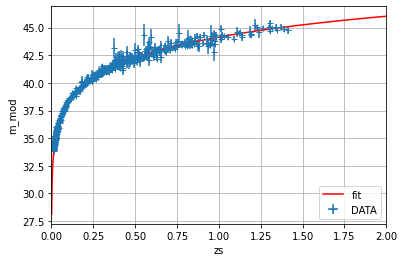

In [27]:
# loop over points (cosmologies) in this space
for IM in np.arange(NOmM):
  for IL in np.arange(NOmL):
    # get predicted magnitudes for this cosmology
    ms = mzz(OmMs[IM],OmLs[IL],zs)  
    # construct a chisq between the theory and the data
    chiv = (mm-ms)/dm
    chisq = np.sum(chiv[~i1]**2)
    # print OmM,OmL,Omk,chisq,ndof
    Z[IL,IM] = min(chisq,Zmax)

# find the minimum chisq
chimin = Z.min()
# and the values of the parameters at the minimum
am  = np.unravel_index(Z.argmin(), Z.shape)
OmM = X[am]
OmL = Y[am]
#Omk = 1.-OmM-OmL
print ('minimum at: ',OmM,OmL,chimin)
mc = mzz(OmM,OmL,zz)  

# find the contour of "no big bang"
b = []
for OmM in OmMs:
  for OmL in OmLs:
      if (np.sum((OmM*(1+zz)**3+OmL) < 0.)):
          b.append((OmM,OmL))
          break
          
b = np.array(b)

# at the minimum, plot the data and the prediction.
plt.figure()
plt.errorbar(zs,mm,xerr=dz,yerr=dm,fmt='+',label=dlabel)
plt.plot(zz,mc,'r',label='fit')
plt.xlim([0,2.0])
plt.xlabel('zs')
plt.ylabel('m_mod')
plt.grid(b=True,which='major')
plt.grid(b=True,which='minor')
plt.legend(loc='lower right')
plt.show()


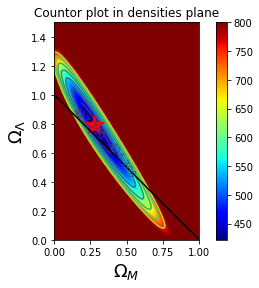

In [28]:
# plot the chisq and contours
plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower', \
                cmap=cm.jet, extent=(0.,1.0,0.,1.5))
plt.colorbar()
CS = plt.contour(X, Y, Z)
CS.levels = [chimin+1., chimin+2., chimin+3.]
plt.clabel(CS, CS.levels, inline=1, fontsize=10)
# plot the minimum
plt.plot(X[am],Y[am],'r*',markersize=20)
plt.plot([1.0, 0.0],[0.0,1.0],'k')
# plot the "no big bang" boundary
#plt.plot(b.T[0],b.T[1],linewidth=3)
plt.xlabel(r'$\Omega_M$',fontsize=18)
plt.ylabel(r'$\Omega_\Lambda$',fontsize=18)
plt.title('Countor plot in densities plane')
plt.show()
